### 참고자료: 
### 1. [파이썬으로 배우는 알고리즘 트레이딩 - 주가 이동평균](https://wikidocs.net/4374)
### 2. [데이콘 9회 펀다](https://dacon.io/competitions/official/140472/codeshare/419/)

# 이동평균 
현재의 값이 반영이 빠르게 되지 않는다. -> __단순 이동평균__

현재의 값을 빠르게 적용 시켜야한다. -> __가중이동평균, 지수이동평균__

In [1]:
from sklearn.metrics import make_scorer
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#!pip install pandas_datareader
data = web.DataReader("068270.KS", "yahoo", "2014-01-01", "2016-03-06")
priceDf = data['Close']

In [3]:
data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-01-02,31098.474609,30387.201172,30624.292969,30466.232422,505562.0,30466.232422
2014-01-03,32639.568359,31454.113281,31533.142578,32323.447266,1623832.0,32323.447266
2014-01-06,32521.023438,31809.750000,32521.023438,32007.326172,438800.0,32007.326172
2014-01-07,34457.269531,31967.810547,32007.326172,34220.175781,1743329.0,34220.175781
2014-01-08,38962.003906,34220.175781,34536.300781,37460.425781,4577654.0,37460.425781
...,...,...,...,...,...,...
2016-02-26,86582.539062,83847.453125,84360.289062,85471.414062,1034898.0,85471.414062
2016-02-29,86326.125000,85044.054688,85898.773438,85471.414062,496846.0,85471.414062
2016-03-02,91625.351562,87351.781250,88035.554688,91625.351562,2381011.0,91625.351562


# 1. 단순 이동평균 (Simple Moving Average)

- 일반적인 이동평균 

단순 이동평균 = (n1+n2+n2)/3

In [4]:
mov5 = priceDf.rolling(5).mean()
mov20 = priceDf.rolling(20).mean()

In [5]:
data.insert(4, 'close_SMA', mov5)

# 2. 지수 이동평균 (Exponential Moving Average)

- 최근에 높은 가중치를 부여, 과거에도 가중치를 두여하도록 고려한 방법.

지수 이동평균 = EMV(t) = (1-w) * EMV(t-1) + w * Price(t)

###  $$ {𝐸𝑀𝐴𝑡=𝐷𝑡×{{2} \over {𝑁+1}}+{𝐸𝑀𝐴_{𝑡−1}}×{(1−{{2} \over {𝑁+1}})}} $$

In [6]:
eMov5 = priceDf.ewm(span=5).mean()
eMov20 = priceDf.ewm(span=20).mean()

In [7]:
data.insert(5, 'close_EMA', eMov5)

# 3. 선형 가중 이동평균  (Weighted Moving Average)

- 일반적으로 최근일에 높은 가중치 부여. (이벤트가 발생한 특정일에 높은 가중치 부여 가능)

가중 이동평균 = (w1n1 + w2n2 + w3*n3) / (w1 + w2 + w3)

In [8]:
def weightedMean(weightArray):
    def inner(x):
        return (weightArray * x).mean()
    return inner

In [9]:
n = 5
t = [v for v in np.arange(1, n+1)]
print(t)
sumv = sum(t) / n
wts = np.array(t) / sumv
print(wts)
wMov5 = priceDf.rolling(n).apply(weightedMean(wts), raw=True)

[1, 2, 3, 4, 5]
[0.33333333 0.66666667 1.         1.33333333 1.66666667]


In [10]:
n = 20
t = [v for v in np.arange(1, n+1)]
print(t)
sumv = sum(t) / n
wts = np.array(t) / sumv
print(wts)
wMov20 = priceDf.rolling(n).apply(weightedMean(wts), raw=True)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[0.0952381  0.19047619 0.28571429 0.38095238 0.47619048 0.57142857
 0.66666667 0.76190476 0.85714286 0.95238095 1.04761905 1.14285714
 1.23809524 1.33333333 1.42857143 1.52380952 1.61904762 1.71428571
 1.80952381 1.9047619 ]


In [11]:
data.insert(6, 'close_WMA', wMov5)

# 이동평균 비교 진행

In [12]:
data

,High,Low,Open,Close,close_SMA,close_EMA,close_WMA,Volume,Adj Close
Date,,,,,,,,,
2014-01-02,31098.474609,30387.201172,30624.292969,30466.232422,NaN,30466.232422,NaN,505562.0,30466.232422
2014-01-03,32639.568359,31454.113281,31533.142578,32323.447266,NaN,31580.561328,NaN,1623832.0,32323.447266
2014-01-06,32521.023438,31809.750000,32521.023438,32007.326172,NaN,31782.713096,NaN,438800.0,32007.326172
2014-01-07,34457.269531,31967.810547,32007.326172,34220.175781,NaN,32795.197596,NaN,1743329.0,34220.175781
2014-01-08,38962.003906,34220.175781,34536.300781,37460.425781,33295.521484,34586.114577,34354.529167,4577654.0,37460.425781
...,...,...,...,...,...,...,...,...,...
2016-02-26,86582.539062,83847.453125,84360.289062,85471.414062,85984.242188,85931.772217,85539.791146,1034898.0,85471.414062
2016-02-29,86326.125000,85044.054688,85898.773438,85471.414062,85488.507812,85778.319499,85368.848437,496846.0,85471.414062
2016-03-02,91625.351562,87351.781250,88035.554688,91625.351562,86548.353125,87727.330187,87414.463021,2381011.0,91625.351562


## Evaluate Metric
- MAE (Mean Absolute Error) : 절댓값 오차의 평균
### $$ MAE= {{1 \over 𝑛} \sum_{𝑖=1}^𝑛|𝑦𝑖−𝑦̂ 𝑖|} $$
- validation을 위한 함수 생성 및 make scorer

In [13]:
def mae(prediction, correct):
    prediction = np.array(prediction)
    correct = np.array(correct)
    
    difference = correct - prediction
    abs_val = abs(difference)
    
    score = abs_val.mean()
    
    return score

mae_scorer = make_scorer(mae)
mae_scorer

make_scorer(mae)

Text(0.5, 1.0, 'Comparison between simple, weighted, and exponentional moving averages')

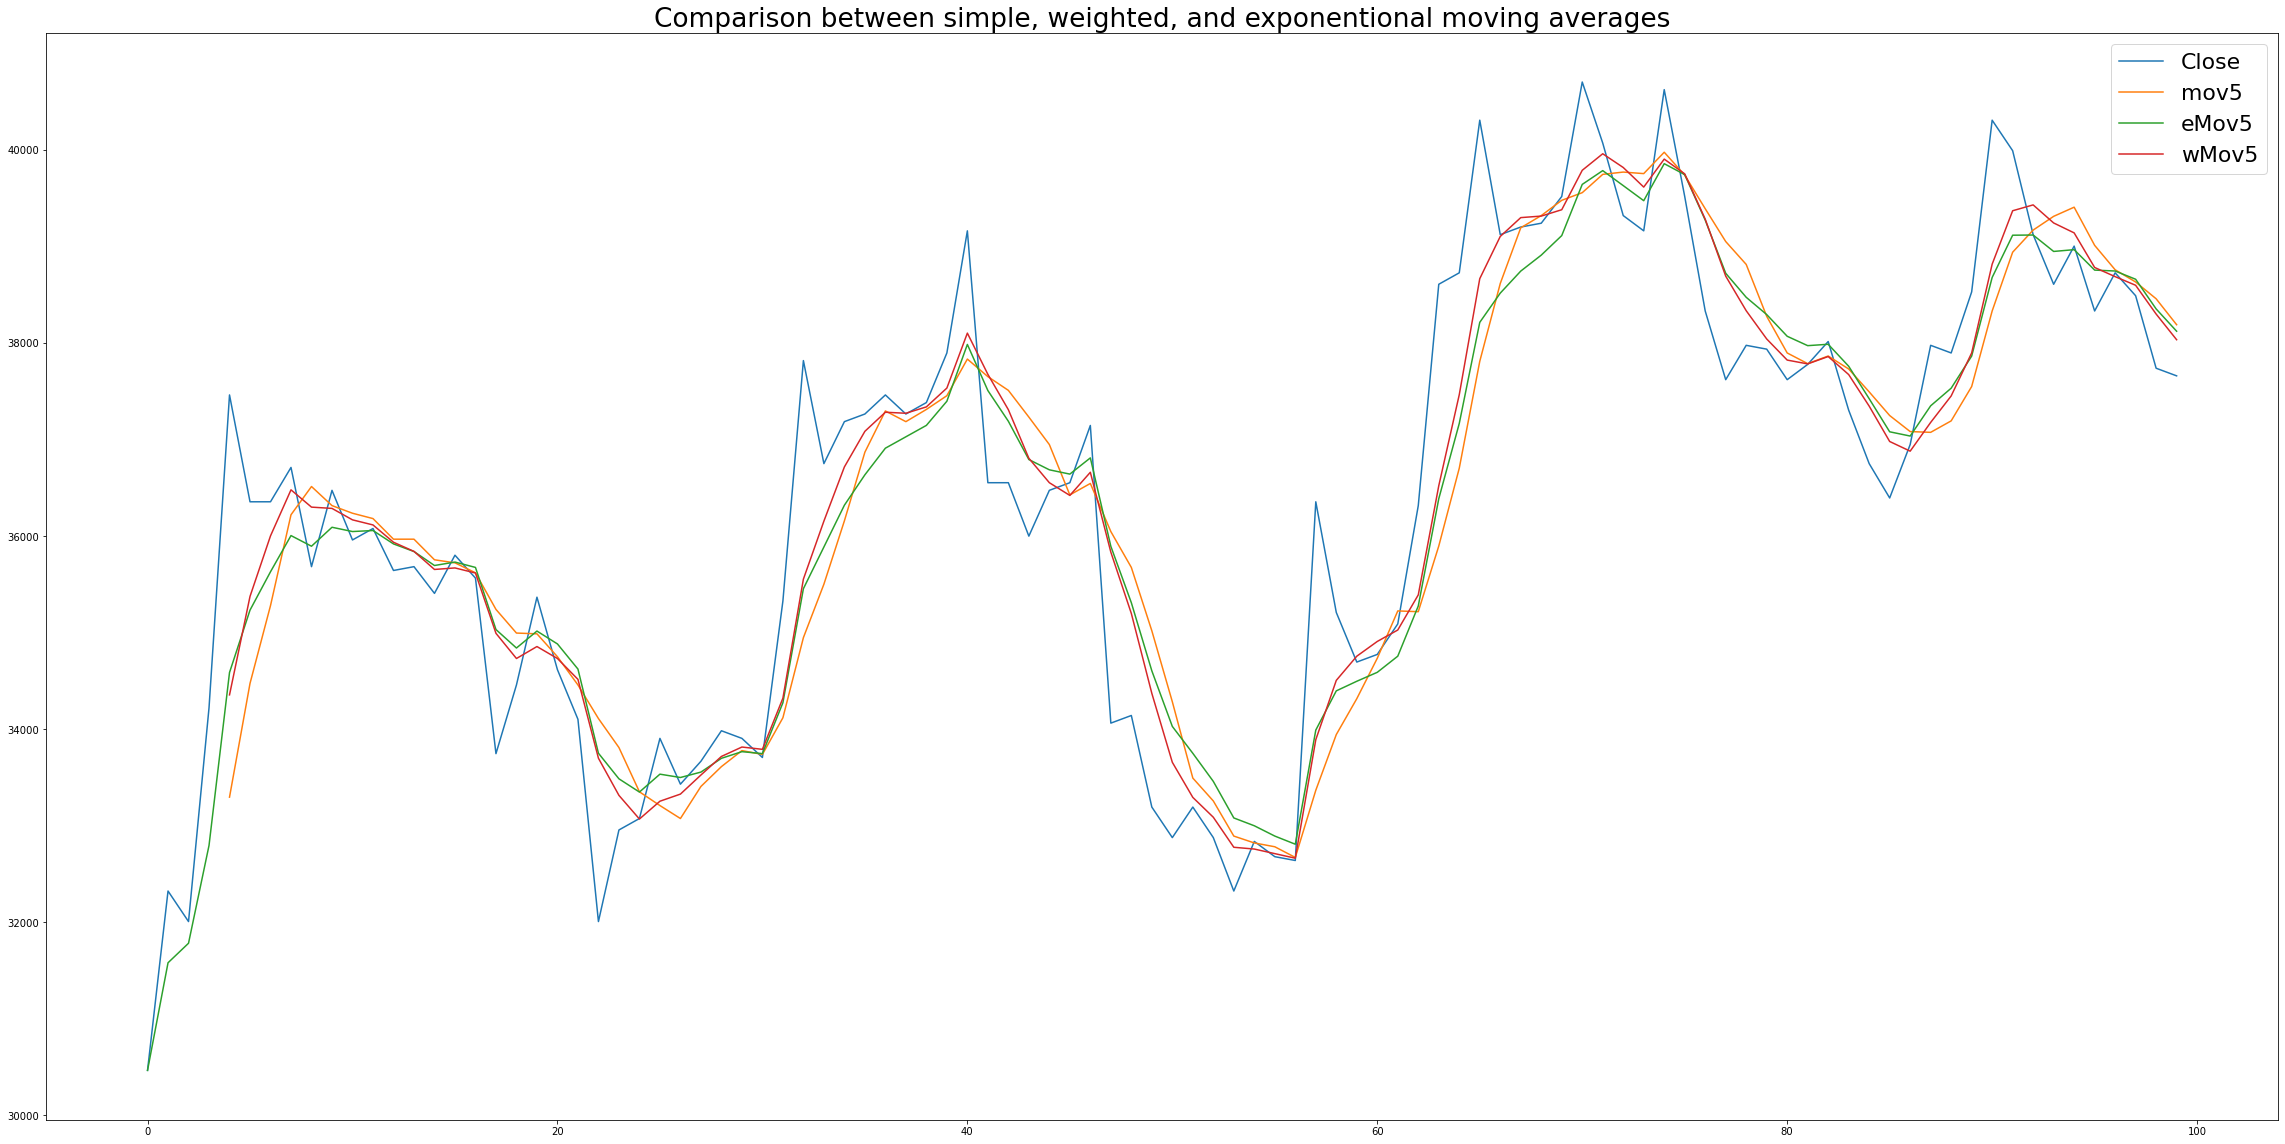

In [14]:
start = 0
end = 100
rindex = pd.RangeIndex(start=start, stop=end)
fig,ax1 = plt.subplots(figsize=[40, 20])
plt.rcParams.update({'font.size': 22})
ax1.plot(rindex, data['Close'].iloc[start:end], label='Close')
ax1.plot(rindex, mov5.iloc[start:end], label='mov5')
ax1.plot(rindex, eMov5.iloc[start:end], label='eMov5')
ax1.plot(rindex, wMov5.iloc[start:end], label='wMov5')
plt.legend()
plt.title('Comparison between simple, weighted, and exponentional moving averages')

In [15]:
print("5 winodw SMA MAE Score : ", mae(data.close_SMA.fillna(0), data.Close.values))
print("5 N EMA MAE Score : ", mae(data.close_EMA.fillna(0), data.Close.values))
print("5 span WMA MAE Score : ", mae(data.close_WMA.fillna(0), data.Close.values))

5 winodw SMA MAE Score :  1564.8442968750003
5 N EMA MAE Score :  1052.0309553816114
5 span WMA MAE Score :  1195.3754504964952


Text(0.5, 1.0, 'Comparison between simple, weighted, and exponentional moving averages')

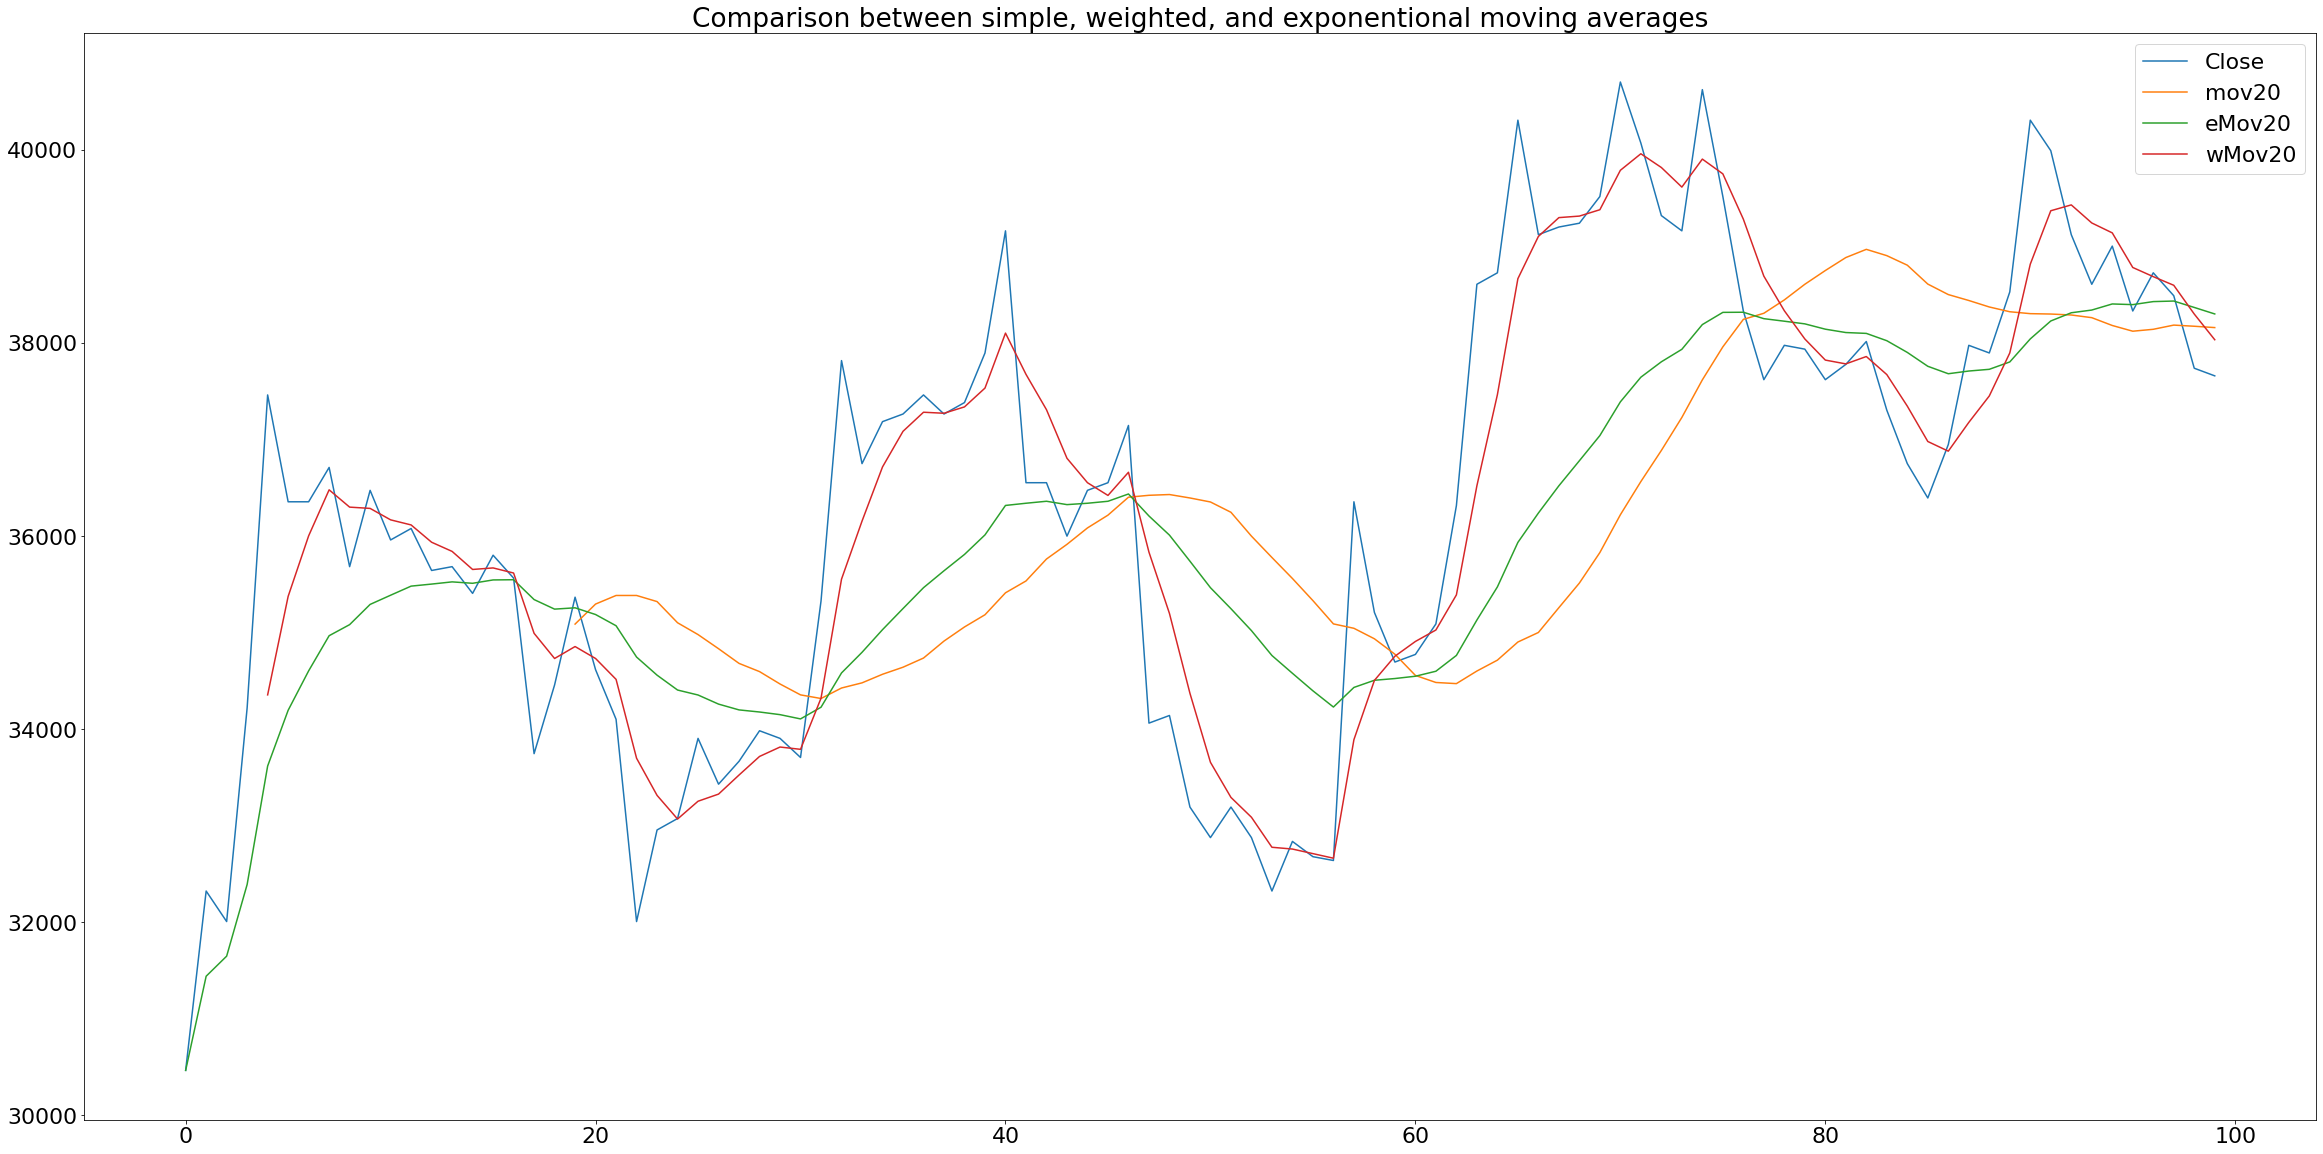

In [16]:
start = 0
end = 100
rindex = pd.RangeIndex(start=start, stop=end)
fig,ax1 = plt.subplots(figsize=[40, 20])
plt.rcParams.update({'font.size': 22})
ax1.plot(rindex, data['Close'].iloc[start:end], label='Close')
ax1.plot(rindex, mov20.iloc[start:end], label='mov20')
ax1.plot(rindex, eMov20.iloc[start:end], label='eMov20')
ax1.plot(rindex, wMov5.iloc[start:end], label='wMov20')
plt.legend()
plt.title('Comparison between simple, weighted, and exponentional moving averages')